Iteration 0, MSE: 0.14043493605455645, Accuracy: 0.3416666666666667
Iteration 500, MSE: 0.08411378189610677, Accuracy: 0.6583333333333333
Iteration 1000, MSE: 0.0684659294263938, Accuracy: 0.6583333333333333
Iteration 1500, MSE: 0.06424980916058795, Accuracy: 0.6583333333333333
Iteration 2000, MSE: 0.062387865708177344, Accuracy: 0.675
Iteration 2500, MSE: 0.060973695984247574, Accuracy: 0.9166666666666666
Iteration 3000, MSE: 0.05931378716829197, Accuracy: 0.95
Iteration 3500, MSE: 0.057328063612335396, Accuracy: 0.95
Iteration 4000, MSE: 0.05533239869823359, Accuracy: 0.9833333333333333
Iteration 4500, MSE: 0.05357005223066184, Accuracy: 0.9916666666666667


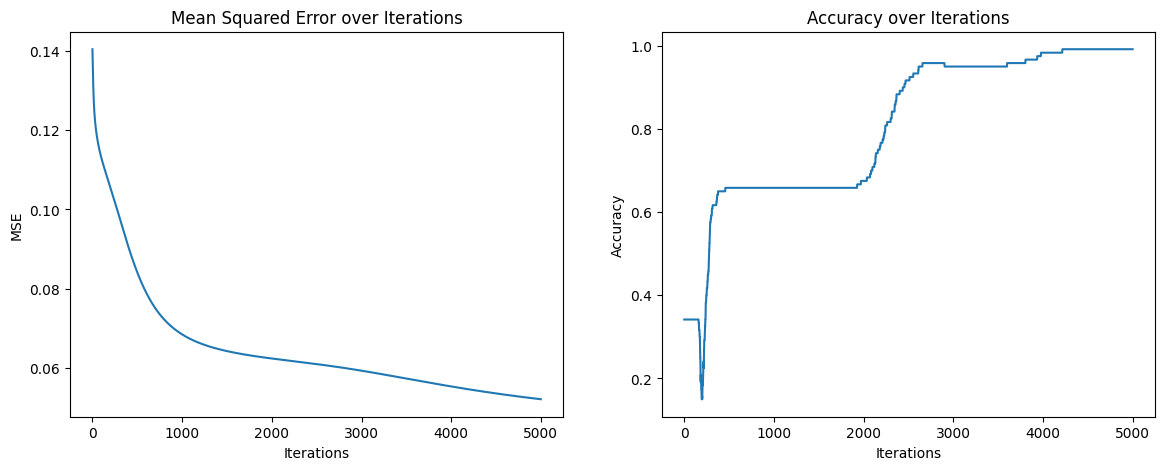

Test Accuracy: 0.9666666666666667


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
data = load_iris()

# Get features and target
X = data.data
y = data.target

# Convert target labels to one-hot encoding
y = pd.get_dummies(y).values

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Initialize hyperparameters
learning_rate = 0.1
iterations = 5000
input_size = X.shape[1]  # Number of input features
hidden_size = 2          # Number of neurons in hidden layer
output_size = y.shape[1] # Number of output classes
N = y_train.shape[0]     # Number of training samples

# Initialize weights with random values
np.random.seed(10)
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W2 = np.random.normal(scale=0.5, size=(hidden_size, output_size))

# Helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true) ** 2).sum() / (2 * y_pred.size)

def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

# Training the Backpropagation Neural Network
results = pd.DataFrame(columns=["mse", "accuracy"])

for itr in range(iterations):
    # Feedforward propagation
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)
    
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    # Calculating error and accuracy
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    #results = results.append({"mse": mse, "accuracy": acc}, ignore_index=True)
    results = pd.concat([results, pd.DataFrame([{"mse": mse, "accuracy": acc}])], ignore_index=True)

    
    # Backpropagation
    E1 = A2 - y_train
    dW2 = E1 * A2 * (1 - A2)
    
    E2 = np.dot(dW2, W2.T)
    dW1 = E2 * A1 * (1 - A1)
    
    # Weight updates
    W2_update = np.dot(A1.T, dW2) / N
    W1_update = np.dot(X_train.T, dW1) / N
    
    W2 -= learning_rate * W2_update
    W1 -= learning_rate * W1_update

    # Print progress every 500 iterations
    if itr % 500 == 0:
        print(f"Iteration {itr}, MSE: {mse}, Accuracy: {acc}")

# Plotting MSE and accuracy over iterations
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(results["mse"])
plt.title("Mean Squared Error over Iterations")
plt.xlabel("Iterations")
plt.ylabel("MSE")

plt.subplot(1, 2, 2)
plt.plot(results["accuracy"])
plt.title("Accuracy over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")

plt.show()

# Testing the model on test data
Z1_test = np.dot(X_test, W1)
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2)
A2_test = sigmoid(Z2_test)

# Calculate test accuracy
test_accuracy = accuracy(A2_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
